<a href="https://colab.research.google.com/github/Nataliahfk/estadistica_python/blob/main/curso_de_estadistica_con_python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=#56B4E9 size=10>CURSO DE ESTADÍSTICA</font>
***

<font color=#56B4E9 size = 5>*Preparando el ambiente*</font>

# <font color=#56B4E9>1 CONOCIENDO LOS DATOS</font>
***

## <font color=#56B4E9>1.1 Dataset del proyecto</font>
***

### Muestra de domicilios Colombia - 2018

Las investigaciones por muestras de domicilios realizadas anualmente, buscan encontrar característcias generales de la población, de educación, trabajo, rendimiento y otras, de acuerdo con las necesidades de información del país, tales como las características de migración, fertilidad, casamientos, salud, nutrición, entre otros temas. Estas muestras al pasar de los años consistuyen una herramienta importante para la formulación, validación y evaluación de políticas dirigidas al desarrollo socioeconómico y la mejora de las condiciones de vida en Colombia.


### Datos

Los datos fueron creados  de manera didáctica para este curso.

### Variables utilizadas

> ### Ingreso
> ***

Ingresos mensuales (en miles de pesos) del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del entrevistado en la fecha de referencia en años.

> ### Altura
> ***

Altura del entrevistado em metros.

> ### Ciudad
> ***

Código de referência a 27 ciudades analizadas.


> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin estudios y menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No se sabe|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indio|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Moreno|
|9|Sin declarar|

> ### Tratamiento a los datos
***

> Algunos de los tratamientos de datos más frecuentes son:
> 1. Eliminar las observaciones (líneas) con entradas de datos inválidos;
> 2. Eliminar observaciones donde hay datos perdidos (missing data);
> 3. Filtros própios de la investigación, por ejemplo: considerar solo las encuestas realizadas a la cabeza de familia (responsable por el domicilio).

### Importando pandas y leyendo el dataset del projecto

https://pandas.pydata.org/

In [2]:
import pandas as pd

In [3]:
datos = pd.read_csv("/content/datos.csv")

In [4]:
datos.sample(5)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
23872,26,0,33,8,1,300,1.799739
53833,35,0,33,2,12,7000,1.653612
11932,21,0,36,8,4,400,1.673812
11370,17,0,29,8,6,1500,1.886353
37844,31,0,53,8,12,5000,1.913090


## <font color=#56B4E9>1.2 Tipos de datos</font>
***

### Clasificación de una variable
<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img001.png' width='70%'>

### Variables cualitativas ordinales

► Variables que pueden ser ordenadas o que responen algun tipo de jerarquía

In [ ]:
sorted(datos['Años de Estudio'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variables cualitativas nominales

► Variables que no pueden ser ordenadas ni responden alguna jerarquía.

In [ ]:
sorted(datos['Sexo'].unique())

[0, 1]

In [ ]:
sorted(datos['Color'].unique())

[0, 2, 4, 6, 8]

In [ ]:
sorted(datos['Ciudad'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

### Variables cuantitativas discretas

► Variables que representan un conteo donde los valores posibles forman un conjunto finito o numerable.


In [5]:
datos.Edad.min() # esta variable se puede colocar sin corchetes, por que es un solo nombre a diferencia de Años de Estudio por ej:

13

In [6]:
datos.Edad.max()

99

In [7]:
print(f"La edad mínima es {datos.Edad.min()} y la edad máxima es {datos.Edad.max()}")

La edad mínima es 13 y la edad máxima es 99


#### <font color='red'>Observación</font>
***
> La variable edad puede ser clasificada de tres formas diferentes:
> 1. <b>CUANTITATIVA DISCRETA</b> - cuando representa años completos (números enteros);
> 2. <b>CUANTITATIVA CONTINUA</b> - cuando representa la edad exacta, siendo representada por fracciones de años;
> 3. <b>CUALITATIVA ORDINAL</b> - cuando representa  intervalos de edad.

### Variables cuantitativas continuas

► Variables que representan un conteo o medición que asume valores en escalas continuas (números reales).

In [8]:
print(f"La Altura mínima es {datos['Altura'].min()} y la altura máxima es {datos['Altura'].max()}")

La Altura mínima es 1.339244614 y la altura máxima es 2.028496765


# <font color=#56B4E9>2 DISTRIBUCIÓN DE FRECUENCIAS</font>
***

El primer paso en un análisis es conocer el comportamiento de las variables involucradas en el estudio. Utilizando técnicas estadísticas como el análisis de las <b> DISTRIBUCIONES DE FRECUENCIAS </b> e <b> HISTOGRAMAS </b> podemos evaluar mejor cómo se distribuyen los fenómenos del estudio.



## <font color=#56B4E9>2.1 Distribución de frecuencias para variables cualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [9]:
# Cuenta la cantidad de femenino y masculino, donde 0 es masculino y 1 es femenino
datos.Sexo.value_counts()

,count
Sexo,
0,53250
1,23590


In [10]:
# Porcentaje por sexo
datos.Sexo.value_counts(normalize=True).round(4)*100

,proportion
Sexo,
0,69.3
1,30.7


In [11]:
# guardo en una variable la cantidad según el sexo
frecuencia_sexo = datos.Sexo.value_counts()
frecuencia_sexo

,count
Sexo,
0,53250
1,23590


In [12]:
# Guardo en una variable el %  según el sexo
porcentaje_sexo = datos.Sexo.value_counts(normalize=True).round(4)*100
porcentaje_sexo

,proportion
Sexo,
0,69.3
1,30.7


In [13]:
dist_frecuencia_cualitativa = pd.DataFrame({'Frecuencia': frecuencia_sexo, 'Porcentaje %': porcentaje_sexo})
dist_frecuencia_cualitativa

,Frecuencia,Porcentaje %
Sexo,,
0,53250,69.3
1,23590,30.7


In [14]:
dist_frecuencia_cualitativa.rename(index={0: 'Masculino', 1: 'Femenino'}, inplace=True)


In [15]:
dist_frecuencia_cualitativa.rename_axis('Sexo', axis= 'columns', inplace=True)
dist_frecuencia_cualitativa

Sexo,Frecuencia,Porcentaje %
Sexo,,
Masculino,53250,69.3
Femenino,23590,30.7


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [16]:
sexo = {0: 'Masculino',
        1: 'Femenino'}

color = {0: 'Indigena',
         2: 'Blanco',
         4: 'Negro',
         6: 'Amarillo',
         8: 'Pardo',
         9: 'Sin declarar'}

In [18]:
# crosstab es para ver 2 variables al mismo tiempo
frecuencia = pd.crosstab(datos.Sexo,
            datos.Color)

frecuencia

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [19]:
frecuencia.rename(index=sexo, inplace=True)
frecuencia.rename(columns=color, inplace=True)
frecuencia

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


In [20]:
# crosstab es para ver 2 variables al mismo tiempo
porcentaje_sexo_color = pd.crosstab(datos.Sexo,
                         datos.Color,
                         normalize= True).round(4)*100
porcentaje_sexo_color.rename(index = sexo,inplace = True)
porcentaje_sexo_color.rename(columns = color,inplace = True)
porcentaje_sexo_color

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Femenino,0.13,12.52,3.76,0.15,14.14


In [21]:
# esta df muestra el ingreso promedio por sexo y por color
porcentaje = pd.crosstab(datos.Sexo,
                         datos.Color,
                         aggfunc = 'mean',
                         values = datos.Ingreso)
porcentaje.rename(index = sexo,inplace = True)
porcentaje.rename(columns = color,inplace = True)
porcentaje

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Femenino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## <font color=#56B4E9>2.2 Distribución de frecuencia para variables cuantitativas (clases personalizadas)</font>
***

### Paso 1 - Especifique los límites de cada clase

Utilice la siguiente clasificación: (SM significa Salario Mínimo)

<b>A</b> ► Más de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Hasta 2 SM

donde <b>SM</b> es el valor del salario mínimo en ese momento. En nuestro caso <b>788 mil pesos colombianos</b> (2018):

<b>A</b> ► Más de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Hasta 1.576


In [22]:
datos.Ingreso.min()

0

In [23]:
datos.Ingreso.max()

200000

In [24]:
# Crear la lista con los valores de las clases descritas anteriormente
clases =[0,1576,3152,7880,15760,200000]
clases

[0, 1576, 3152, 7880, 15760, 200000]

In [25]:
# crear la lista con los parametros indicados anteriormente, según el ingreso
label = ['E','D','C','B','A']

### Paso 2 - Crear la tabla de frecuencias

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [26]:
# pd.cut genera una tabla con los intervalos y su cantidad
frecuencia = pd.Series(
        pd.cut(
        x=datos.Ingreso,
        bins=clases,         # Intervalos
        labels=label,        # Nombres de las clases
        include_lowest=True  # Incluir el límite inferior
    )).value_counts()

frecuencia

,count
Ingreso,
E,49755
D,16700
C,7599
B,2178
A,608


In [27]:
porcentaje = pd.Series(
        pd.cut(
        x=datos.Ingreso,
        bins=clases,         # Intervalos
        labels=label,        # Nombres de las clases
        include_lowest=True,  # Incluir el límite inferior
    )).value_counts(normalize = True).round(4)*100   # para que saque el % se coloca como argumento de value.count

porcentaje

,proportion
Ingreso,
E,64.75
D,21.73
C,9.89
B,2.83
A,0.79


In [28]:
dist_frec_cuant_personalizada = pd.DataFrame({'Frecuencia': frecuencia, 'Porcentaje %': porcentaje})
dist_frec_cuant_personalizada

,Frecuencia,Porcentaje %
Ingreso,,
E,49755,64.75
D,16700,21.73
C,7599,9.89
B,2178,2.83
A,608,0.79


In [29]:
dist_frec_cuant_personalizada.sort_index(ascending = False)

,Frecuencia,Porcentaje %
Ingreso,,
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


## <font color=#56B4E9>2.3 Distribución de frecuencia para variables cuantitativas (clases de amplitud fija)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [30]:
import numpy as np

### Paso 1 - Difiniendo el número de clases

#### Regla de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [31]:
# Muestra solo la cantidad de filas de mi DF
n = datos.shape[0]

In [32]:
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

17

### Paso 2 - Crear la tabla de frecuencias

In [33]:
# pd.cut(x=datos.Ingreso, bins=17, include_lowest=True) Calcula 17 intervalos (bins) que dividen el rango desde el mínimo
# hasta el máximo de datos.Ingreso en partes de igual ancho. Asigna a cada valor de Ingreso la etiqueta del intervalo al
# que pertenece, por ejemplo (1000.0, 2000.0]. include_lowest=True hace que el primer intervalo incluya su extremo izquierdo
# (asegura que el valor mínimo quede dentro de la primera clase).

frecuencia_sturges = pd.Series(
                     pd.cut(
                     x=datos.Ingreso,
                     bins=17,             # Intervalos
                     include_lowest=True  # Incluir el límite inferior
                     )).value_counts()

frecuencia_sturges

,count
Ingreso,
"(-200.001, 11764.706]",75594
"(11764.706, 23529.412]",1022
"(23529.412, 35294.118]",169
"(35294.118, 47058.824]",19
"(47058.824, 58823.529]",16
"(94117.647, 105882.353]",6
"(58823.529, 70588.235]",5
"(70588.235, 82352.941]",4
"(188235.294, 200000.0]",3


In [34]:
porcentaje_sturges = pd.Series(
                     pd.cut(
                     x=datos.Ingreso,
                     bins=17,         # Intervalos
                     include_lowest=True,  # Incluir el límite inferior
                    )).value_counts(normalize = True).round(4)*100   # para que saque el % se coloca como argumento de value.count

porcentaje_sturges

,proportion
Ingreso,
"(-200.001, 11764.706]",98.38
"(11764.706, 23529.412]",1.33
"(23529.412, 35294.118]",0.22
"(35294.118, 47058.824]",0.02
"(47058.824, 58823.529]",0.02
"(94117.647, 105882.353]",0.01
"(58823.529, 70588.235]",0.01
"(70588.235, 82352.941]",0.01
"(188235.294, 200000.0]",0.00


In [35]:
dist_frec_cuant_amplitud_fija = pd.DataFrame({'Frecuencia': frecuencia_sturges, 'Porcentaje %': porcentaje_sturges})
dist_frec_cuant_amplitud_fija

,Frecuencia,Porcentaje %
Ingreso,,
"(-200.001, 11764.706]",75594,98.38
"(11764.706, 23529.412]",1022,1.33
"(23529.412, 35294.118]",169,0.22
"(35294.118, 47058.824]",19,0.02
"(47058.824, 58823.529]",16,0.02
"(94117.647, 105882.353]",6,0.01
"(58823.529, 70588.235]",5,0.01
"(70588.235, 82352.941]",4,0.01
"(188235.294, 200000.0]",3,0.00


## <font color=#56B4E9>2.4 Histograma</font>
***

El <b>HISTOGRAMA</b> es la representación gráfica de una distribución de frecuencia. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

### Importando la biblioteca

https://seaborn.pydata.org/

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

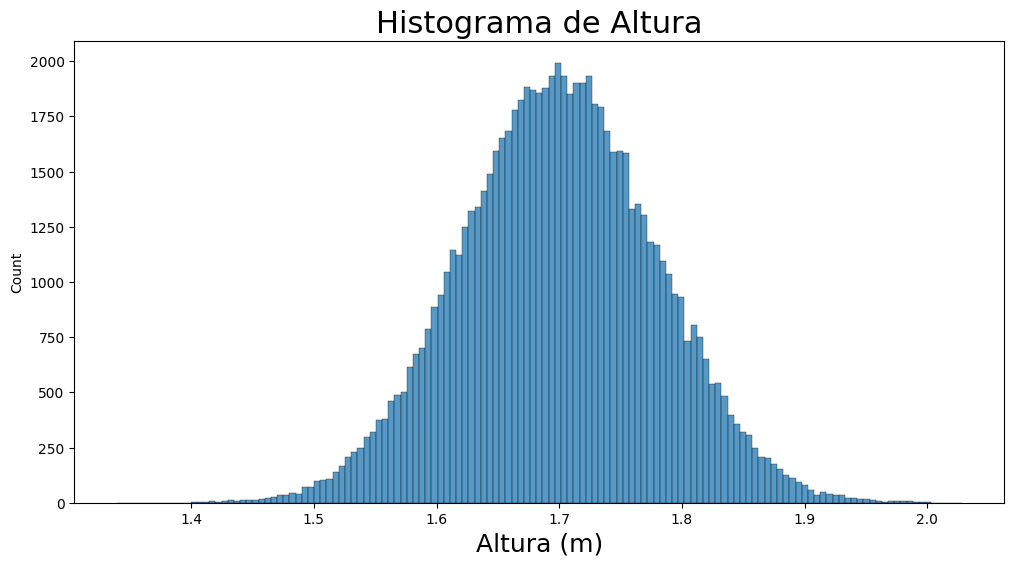

In [37]:
ax = sns.histplot(datos.Altura, kde = False) # histplot es histograma
ax.figure.set_size_inches(12, 6)

ax.set_title('Histograma de Altura', fontsize = 22)
ax.set_xlabel('Altura (m)', fontsize = 18)
plt.show()

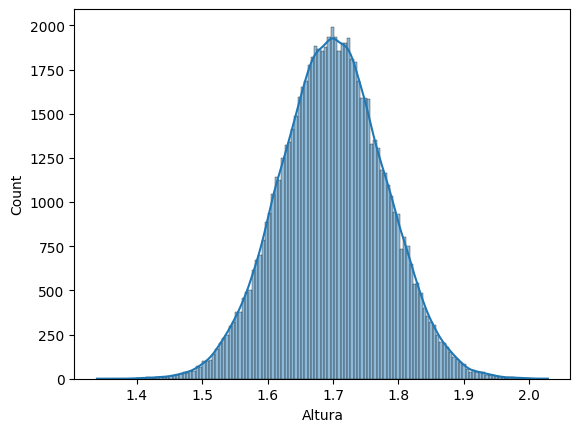

In [38]:
ax = sns.histplot(datos.Altura, kde = True) # histplot es histograma

# kde es estimación de densidad por núcleo / kde=False → solo barras / kde=True → barras + curva suave que indica dónde se concentran más los datos.

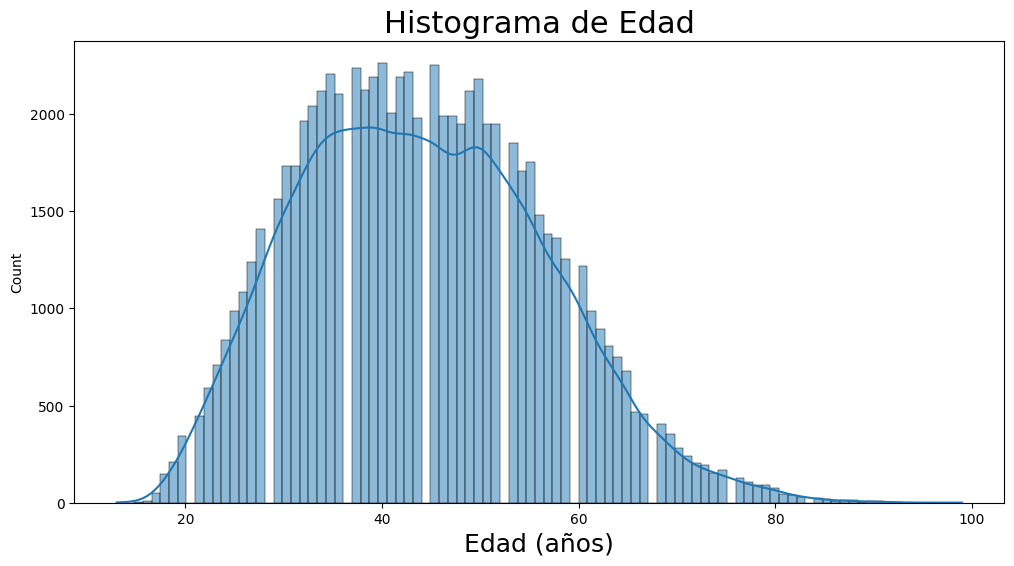

In [39]:
ax = sns.histplot(datos.Edad, kde = True) # histplot es histograma
ax.figure.set_size_inches(12, 6)

ax.set_title('Histograma de Edad', fontsize = 22)
ax.set_xlabel('Edad (años)', fontsize = 18)
plt.show()

# <font color=#56B4E9>3 MEDIDAS DE TENDENCIA CENTRAL</font>
***

## DataFrame de ejemplo

In [40]:
df = pd.DataFrame(data = {'María': [8, 10, 4, 8, 6, 10, 8],
                          'Pedro': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Pablo': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index = ['Matemática',
                           'Portugués',
                           'Inglés',
                           'Geografía',
                           'Historia',
                           'Física',
                           'Química'])
df.rename_axis('Asignaturas', axis = 'columns', inplace = True)
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=#56B4E9>3.1 Media aritmética</font>
***

Es representada por $\mu$ cuando se refiere a la población y por $\bar{X}$ cuando se refiere a la muestra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

donde

$n$ = número de observaciones (registros)

$X_i$ = valor de la i-ésima observación (registro)

In [41]:
# Promedio
df['María'].mean()

np.float64(7.714285714285714)

Ej: Queremos saber la media del ingreso por sexo por las personas del Daset

In [42]:
df_sexo_ingreso = datos.groupby('Sexo')['Ingreso'].mean()
df_sexo_ingreso

,Ingreso
Sexo,
0,2192.441596
1,1566.847393


In [43]:
df_sexo_ingreso.rename(index={0: 'Masculino', 1: 'Femenino'}, inplace=True)
df_sexo_ingreso

,Ingreso
Sexo,
Masculino,2192.441596
Femenino,1566.847393


## <font color=#56B4E9>3.2 Mediana</font>
***

Para obtener la mediana de un conjunto de datos, debemos proceder de la siguiente manera:
1. Ordenar el conjunto de datos;
2. Identificar el número de observaciones (registros) del conjunto de datos ($n$);
3. Identicar el elemento del medio:

> Cuando $n$ sea impar, la posición del elemento del medio se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n+1}{2}$$

> Cuando $n$ sea par, la posición del elemento mediano se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n}2$$

4. Obtener la mediana:

> Cuando $n$ sea impar:


# $$Md = X_{Elemento_{Md}}$$

> Cuando $n$ sea par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Ejemplo 1 - n impar

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img002.png' width='40%' style="float:left">

### Obtener la mediana en nuestro conjunto de datos

In [44]:
notas_maria = df['María']
notas_maria

,María
Matemática,8
Portugués,10
Inglés,4
Geografía,8
Historia,6
Física,10
Química,8


In [45]:
notas_maria = notas_maria.sort_values()
notas_maria

,María
Inglés,4
Historia,6
Geografía,8
Matemática,8
Química,8
Portugués,10
Física,10


In [46]:
n = notas_maria.shape[0]
n

7

In [47]:
# El df notas_maria tiene en el indice los valores de las materias, por lo que se debe reindexar
notas_maria = notas_maria.reset_index(drop=True)
notas_maria

,María
0,4
1,6
2,8
3,8
4,8
5,10
6,10


In [48]:
# Identificar elemento del medio (Media)
elemento_medio = (n+1)/2
elemento_medio

4.0

In [49]:
# .loc para localizar el valor
notas_maria.loc[elemento_medio - 1]

np.int64(8)

In [51]:
notas_maria.median()

8.0

In [52]:
# Python ya tiene para sacar la mediana y no es necesario hacer todo lo anterior
df['María'].median()

8.0

### Ejemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img003.png' width='50%' style="float:left">

In [53]:
notas_pedro = df['Pedro'].sample(6)
notas_pedro

,Pedro
Matemática,10.0
Inglés,0.5
Portugués,2.0
Química,10.0
Historia,3.0
Geografía,1.0


In [54]:
notas_pedro = notas_pedro.sort_values()
notas_pedro

,Pedro
Inglés,0.5
Geografía,1.0
Portugués,2.0
Historia,3.0
Química,10.0
Matemática,10.0


In [55]:
# con numpy
mediana_notas_pedro = np.median(notas_pedro)
mediana_notas_pedro

np.float64(2.5)

In [56]:
# con pandas
pd.Series.median(notas_pedro)

2.5

## <font color=#56B4E9>3.3 Moda</font>
***

La moda se puede definir como el valor más frecuente de un conjunto de datos. La moda es ampliamente utilizada para datos cualitativos.

In [57]:
df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


In [58]:
ejemplo = pd.Series([1, 2, 2, 2, 3, 4, 5, 5, 5])
ejemplo.mode()

,0
0,2
1,5


### Obteniendo la moda de nuestro dataset

In [59]:
datos.Ingreso.mode()

,Ingreso
0,788


In [60]:
datos.Edad.mode()

,Edad
0,40


In [152]:
datos.Altura.mode() # este parametro es multimodal , pk no existe una unica moda

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


## <font color=#56B4E9>3.4 Relación entre media, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img004.png' width='80%'>

### Evaluando la variable INGRESO

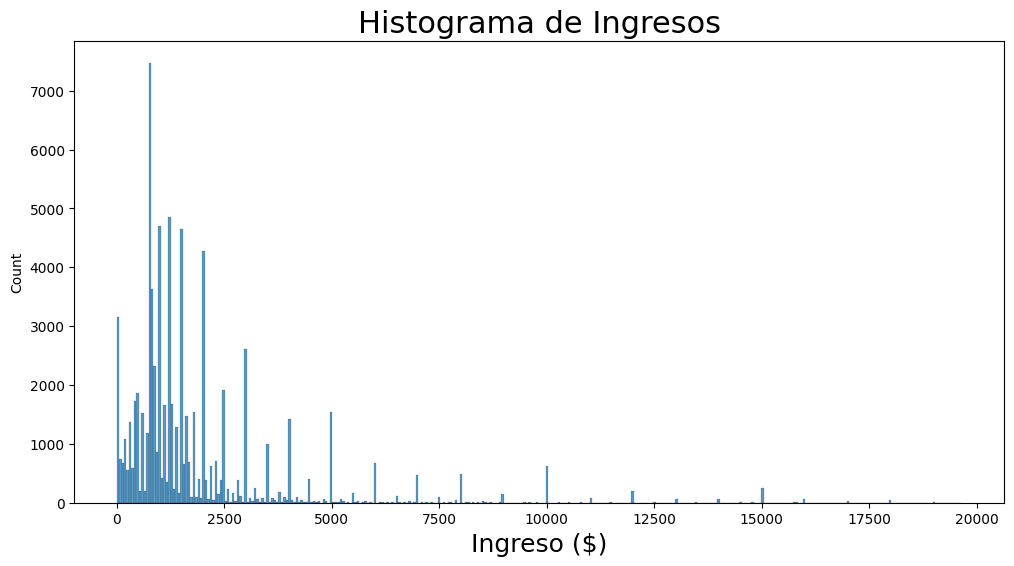

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(datos.query('Ingreso < 20000').Ingreso)  # histplot es histograma
ax.figure.set_size_inches(12, 6)

ax.set_title('Histograma de Ingresos', fontsize=22)
ax.set_xlabel('Ingreso ($)', fontsize=18)
plt.show()

In [62]:
moda_ingreso = datos.Ingreso.mode()
moda_ingreso

,Ingreso
0,788


In [63]:
mediana_ingreso = datos.Ingreso.median()
mediana_ingreso

1200.0

In [64]:
promedio_ingresos = datos.Ingreso.mean()
promedio_ingresos

np.float64(2000.3831988547631)

La variable 'Ingreso' tiene un comportamiento asimetrica a la derecha. En donde la MOda(788) es mucho menor a la MEDIANA(1200) y MENOR que el promedio(2000)

***

### Evaluando la variable ALTURA

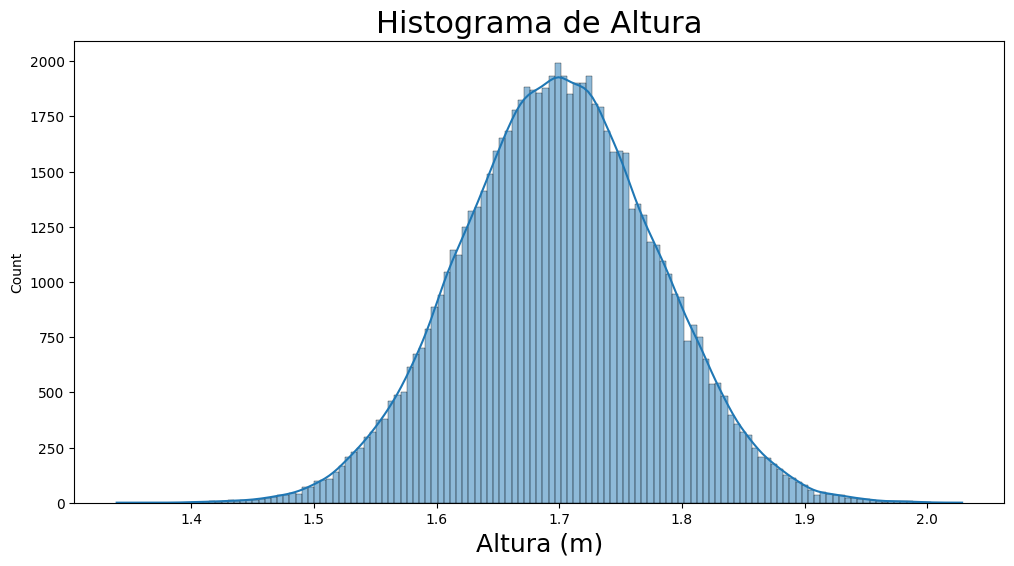

In [65]:
ax=sns.histplot(datos.Altura, kde=True)
ax.figure.set_size_inches(12,6)

ax.set_title('Histograma de Altura', fontsize=22)
ax.set_xlabel('Altura (m)', fontsize=18)
plt.show()

In [66]:
moda_altura = datos.Altura.mode()
moda_altura

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


In [67]:
mediana_altura = datos.Altura.median()
mediana_altura

1.6993247325

In [68]:
promedio_altura = datos.Altura.mean()
promedio_altura

np.float64(1.6995124540575741)

Esta variable es Símetrica, ya que los valores son similares.

***

### Evaluando la variable AÑOS DE ESTUDIO

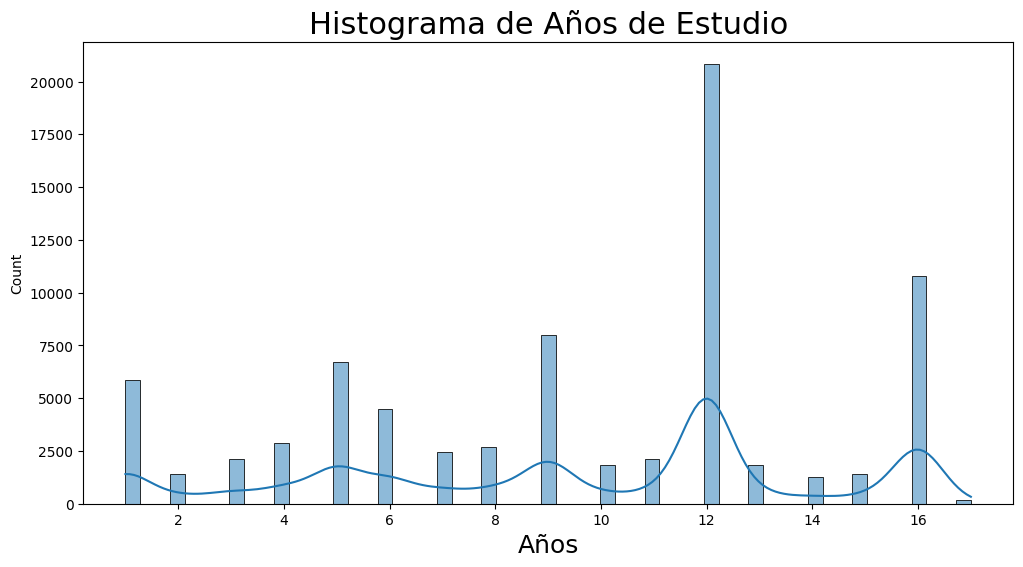

In [69]:
ax=sns.histplot(datos['Años de Estudio'], kde=True)
ax.figure.set_size_inches(12,6)

ax.set_title('Histograma de Años de Estudio', fontsize=22)
ax.set_xlabel('Años', fontsize=18)
plt.show()

In [70]:
moda_ano_estudios = datos['Años de Estudio'].mode()
moda_ano_estudios

,Años de Estudio
0,12


In [71]:
mediana_ano_estudio = datos['Años de Estudio'].median()
mediana_ano_estudio

11.0

In [72]:
promedio_ano_estudios = datos['Años de Estudio'].mean()
promedio_ano_estudios

np.float64(9.469664237376367)

# <font color=#56B4E9>4 MEDIDAS DE LOCALIZACIÓN</font>
***

## <font color=#56B4E9>4.1 Cuartiles, deciles y percentiles</font>
***

Hay una serie de medidas de posición similares en su diseño a la mediana, aunque no son medidas de tendencia central. Como se sabe, la mediana divide la distribución en dos partes iguales en términos del número de elementos en cada parte. Los cuartiles, por otro lado, permiten que la distribución se divida en cuatro partes iguales en términos del número de elementos en cada uno; deciles en diez partes y centiles en cien partes iguales.

In [73]:
# La formula quantile es para calcular cuartil, decil y percentil
datos.Ingreso.quantile([0.25, 0.50, 0.75])

# aqui estoy calculando cuartiles / 0.25 es el percentil 25 (primer cuartil), 0.50 es la mediana, 0.75 es el percentil 75 (tercer cuartil)
# El índice 0.99 te indica el valor por debajo del cual está el 99 % de los datos (solo el 1 % es mayor).

,Ingreso
0.25,788.0
0.50,1200.0
0.75,2000.0


In [75]:
[i/10 for i in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [76]:
datos.Ingreso.quantile([i/10 for i in range(1,10)]) # aqui estoy calculando deciles // el 0.05 sería la mediana
# el 1% está por debajo de 350 pesos colombianos, el 40% esta por debajo de 1000 pesos colombianos y el 99% esta por debajo de 4000 pesos colombianos

,Ingreso
0.1,350.0
0.2,788.0
0.3,800.0
0.4,1000.0
0.5,1200.0
0.6,1500.0
0.7,1900.0
0.8,2500.0
0.9,4000.0


In [78]:
# 0,05 percentil 5 de nuestra BD gana salario 100.0 de peso colombiano, y el percentil 99 equivale a 15000 pesos colombianos
# el 5 % esta por debajo de 100 pesos colombianos, el 99% esta por debajo de 15000 pesos colombianos // el 0.05 sería la mediana
datos.Ingreso.quantile([i/100 for i in range(1,100)])

,Ingreso
0.01,0.0
0.02,0.0
0.03,0.0
0.04,50.0
0.05,100.0
...,...
0.95,6000.0
0.96,7000.0
0.97,8000.0
0.98,10000.0


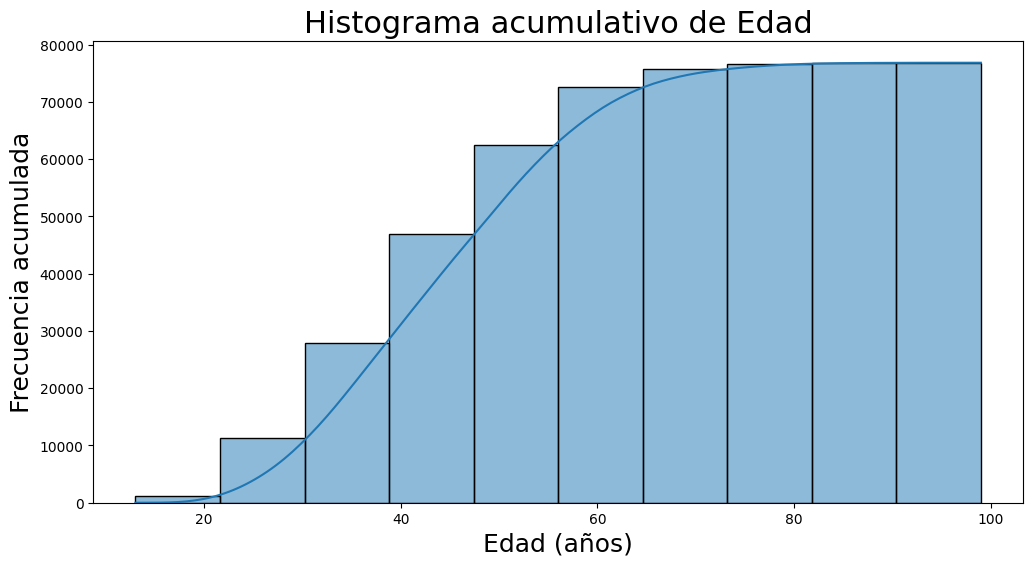

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(
    data=datos,
    x="Edad",
    bins=10,             # Deciles
    cumulative=True,     # Histograma acumulativo
    kde=True,           # Si quieres la curva, pon True
    ax=ax
)

ax.set_title('Histograma acumulativo de Edad', fontsize=22)
ax.set_xlabel('Edad (años)', fontsize=18)
ax.set_ylabel('Frecuencia acumulada', fontsize=18)

plt.show()

In [83]:
datos.Edad.quantile([i/10 for i in range(1,10)])

,Edad
0.1,28.0
0.2,33.0
0.3,36.0
0.4,40.0
0.5,43.0
0.6,47.0
0.7,51.0
0.8,55.0
0.9,61.0


## <font color=#56B4E9>4.2 Box-plot</font>
***

El *box plot* da una idea de la posición, dispersión, asimetría, colas y valores extremos. La posición central está dada por la mediana y la dispersión por $IIQ$ (distancia inter cuartil). Las posiciones relativas de $Q1$, $Mediana$ y $Q3$ dan una idea de la simetría de la distribución. Las longitudes de las colas están dadas por las líneas que van desde el rectángulo a los valores remotos y por los valores extremos.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img005.png' width='65%'>

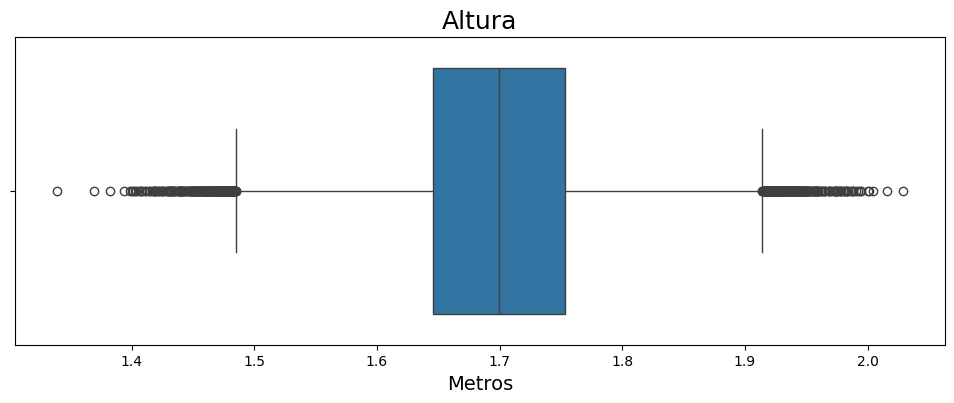

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(
    x='Altura',
    data=datos,
    orient='h'  # Horizontal
)

ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
plt.show()

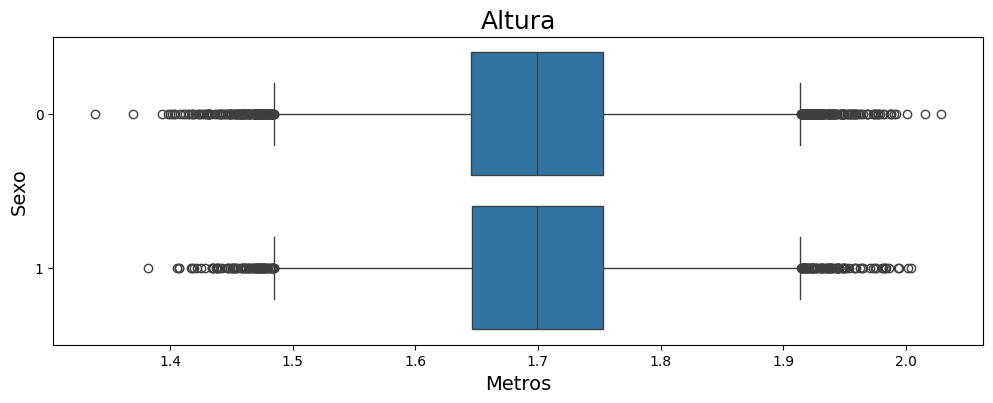

In [90]:
ax = sns.boxplot(
    x='Altura',
    y = 'Sexo',
    data=datos,
    orient='h'  # Horizontal
)

ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
plt.show()

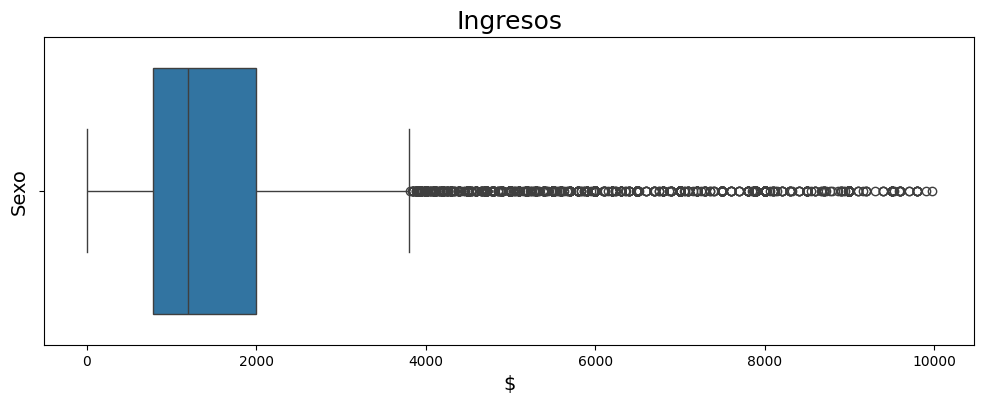

In [93]:
ax = sns.boxplot(
    x='Ingreso',
    data=datos.query('Ingreso < 10000'), # esto es para el ejemplo y hacer zoom donde estan los datos
    orient='h'  # Horizontal
)

ax.figure.set_size_inches(12, 4)
ax.set_title('Ingresos', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
plt.show()

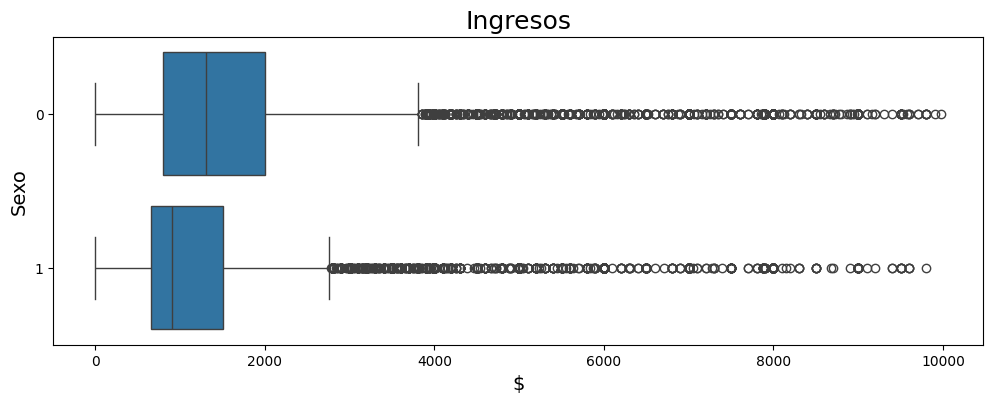

In [92]:
ax = sns.boxplot(
    x='Ingreso',
    y = 'Sexo',
    data=datos.query('Ingreso < 10000'), # esto es para el ejemplo y hacer zoom donde estan los datos
    orient='h'  # Horizontal
)

ax.figure.set_size_inches(12, 4)
ax.set_title('Ingresos', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
plt.show()

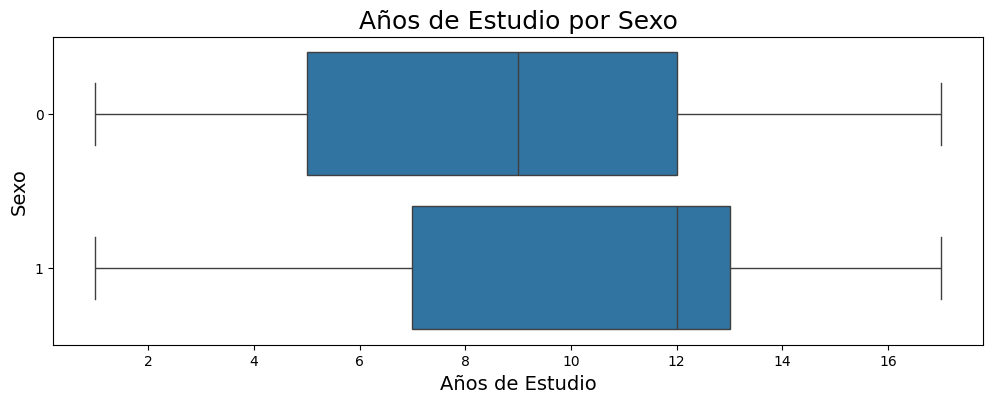

In [95]:
ax = sns.boxplot(
    x='Años de Estudio',
    y = 'Sexo',
    data=datos, # esto es para el ejemplo y hacer zoom donde estan los datos
    orient='h'  # Horizontal
)

ax.figure.set_size_inches(12, 4)
ax.set_title('Años de Estudio por Sexo', fontsize=18)
ax.set_xlabel('Años de Estudio', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
plt.show()

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img006.png' width='80%'>

# <font color=#56B4E9>5 MEDIDAS DE DISPERSIÓN</font>
***

Aunque las medidas de tendencia central y de localización proporcionan un resumen muy importante de los datos, pueden no ser suficientes para caracterizar diferentes conjuntos, especialmente cuando las observaciones de una distribución dada presentan datos muy dispersos.

## <font color=#56B4E9>5.1 Desviación media absoluta</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [96]:
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [97]:
notas_maria_dispersion = df[['María']]
notas_maria_dispersion

Asignaturas,María
Matemática,8
Portugués,10
Inglés,4
Geografía,8
Historia,6
Física,10
Química,8


In [104]:
notas_media_maria = notas_maria_dispersion.mean().iloc[0]
notas_media_maria

np.float64(7.714285714285714)

In [106]:
notas_maria_dispersion['Desviación'] = (notas_maria_dispersion['María'] - notas_media_maria)
notas_maria_dispersion

/tmp/ipython-input-2824314730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_maria_dispersion['Desviación'] = (notas_maria_dispersion['María'] - notas_media_maria)


Asignaturas,María,Desviación
Matemática,8,0.285714
Portugués,10,2.285714
Inglés,4,-3.714286
Geografía,8,0.285714
Historia,6,-1.714286
Física,10,2.285714
Química,8,0.285714


LA DESVIASION MEDIA ABSOLUTA NO PUEDE SER NEGATIVA

In [107]:
notas_maria_dispersion['Desviación_absoluta']= notas_maria_dispersion['Desviación'].abs()
notas_maria_dispersion

Asignaturas,María,Desviación,Desviación_absoluta
Matemática,8,0.285714,0.285714
Portugués,10,2.285714,2.285714
Inglés,4,-3.714286,3.714286
Geografía,8,0.285714,0.285714
Historia,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


Tenemos que instalar una nueva Biblioteca

In [108]:
!pip install scipy

In [109]:
import scipy.stats as stats

In [110]:
# desviacion Media Absoluta / MAD es una medida de dispersión que indica, en promedio, cuánto se alejan los datos de su media.
mad_notas_maria = stats.median_abs_deviation(notas_maria_dispersion['María'])
mad_notas_maria

np.float64(2.0)

####**Para saber más: entendiendo mejor la desviación media absoluta**

Hemos visto cómo calcular la desviación estándar, una medida clave de dispersión que nos indica cuánto se alejan, en promedio, los datos de la media. Pero, ¿cómo podemos visualizar estas desviaciones de manera gráfica para entender mejor la distribución de nuestros datos?

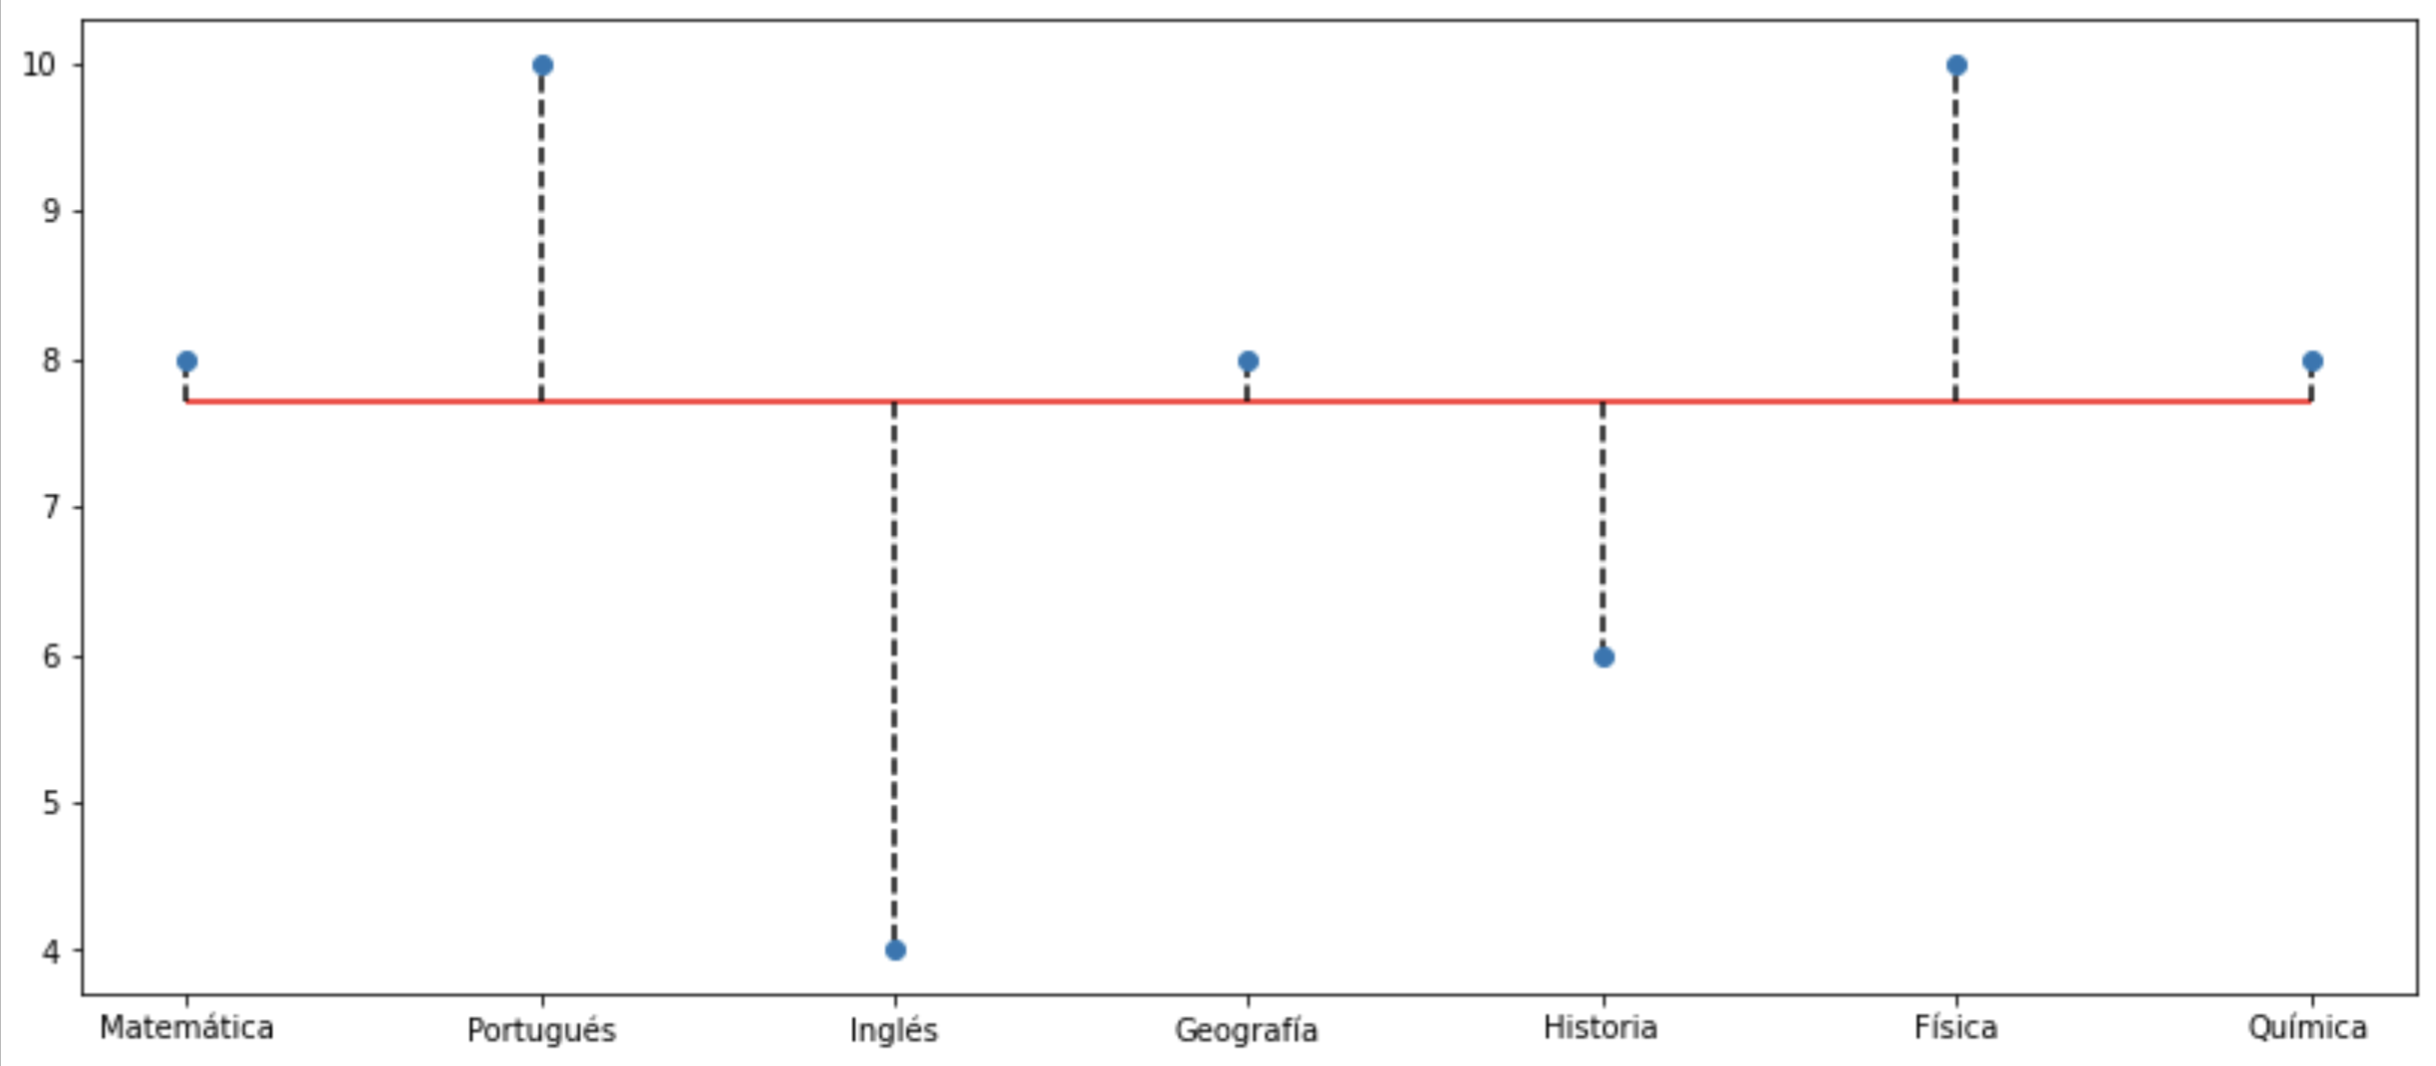

El gráfico muestra las notas de María en 7 materias diferentes: Matemática, Portugués, Inglés, Geografía, Historia, Física y Química. Cada materia está representada en el eje horizontal, y las notas correspondientes se muestran en el eje vertical.

- Elementos Clave:

- Puntos Azules: Representan las notas de María en cada materia. Por ejemplo, en Matemática obtuvo una nota de 8.

- Línea Roja Horizontal: Esta línea indica la media (promedio) de todas las notas de María. En este caso, la media parece ser 8.

- Líneas Punteadas Verticales: Para cada materia, hay una línea punteada que conecta la nota de María con la línea roja de la media.

- La longitud de estas líneas representa visualmente la desviación de cada nota respecto a la media.

- Si la línea punteada va hacia arriba, significa que María obtuvo una nota superior a la media en esa materia.

- Si la línea punteada va hacia abajo, la nota está por debajo de la media.

**Interpretación:**

- Rendimiento General: En general, María parece tener un rendimiento consistente, ya que la mayoría de sus notas están cerca de la media (línea roja).

- Materias Destacadas: En Historia y Física, las líneas punteadas son más largas y apuntan hacia arriba, lo que indica que María obtuvo notas significativamente superiores a su media en esas materias.

- Materias a Mejorar: En Portugués e Inglés, las líneas punteadas son más largas y apuntan hacia abajo, sugiriendo que María obtuvo notas inferiores a su media en esas materias.

**Conclusión:**

Este gráfico nos permite visualizar rápidamente el rendimiento de María en cada materia en relación con su promedio general. Nos da una idea de en qué materias se destaca y en cuáles podría necesitar mejorar.

## <font color=#56B4E9>5.2 Varianza</font>
***

### Varianza

La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media son elevadas al cuadrado.

### Varianza de la población

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Varianza de la muestra

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [111]:
notas_maria_dispersion

Asignaturas,María,Desviación,Desviación_absoluta
Matemática,8,0.285714,0.285714
Portugués,10,2.285714,2.285714
Inglés,4,-3.714286,3.714286
Geografía,8,0.285714,0.285714
Historia,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [112]:
notas_maria_dispersion['(Desviacion)^2'] = notas_maria_dispersion['Desviación'].pow(2)
notas_maria_dispersion

Asignaturas,María,Desviación,Desviación_absoluta,(Desviacion)^2
Matemática,8,0.285714,0.285714,0.081633
Portugués,10,2.285714,2.285714,5.224490
Inglés,4,-3.714286,3.714286,13.795918
Geografía,8,0.285714,0.285714,0.081633
Historia,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


La varianza es una medida estadística que indica cuánto se dispersan o alejan los datos respecto a la media.

In [114]:
notas_maria_dispersion['(Desviacion)^2'].sum() / (len(notas_maria_dispersion) - 1)

np.float64(4.57142857142857)

In [116]:
# Para calcular la variación utilizar .var()
notas_maria_dispersion['María'].var()

4.57142857142857

## <font color=#56B4E9>5.3 Desviación estándar</font>
***

Una de las restricciones de la varianza es el hecho de que proporciona medidas cuadráticas de las unidades originales; la varianza de las medidas de longitud, por ejemplo, está en unidades de área. Por lo tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

### Desviación estándar de la población

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$


### Desviación estándar de la muestra

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [117]:
varianza = notas_maria_dispersion['María'].var()
varianza

4.57142857142857

In [119]:
# calcular la raíz cuadrada del valor contenido en la variable varianza. / te devuelve la desviación estándar
np.sqrt(varianza)

np.float64(2.1380899352993947)

In [122]:
# std es la abreviatura de desvision estandar / Esta es la formula que se utiliza
desviasion_estandar = notas_maria_dispersion['María'].std()
desviasion_estandar

2.1380899352993947

In [123]:
# promedio Notas
df.mean()

,0
Asignaturas,
María,7.714286
Pedro,5.142857
Pablo,7.714286


In [125]:
# meadiana ( Nota central)
df.median()

,0
Asignaturas,
María,8.0
Pedro,3.0
Pablo,8.0


In [126]:
# Moda, nota que más se repite
df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


In [127]:
df.std()

,0
Asignaturas,
María,2.138090
Pedro,4.460141
Pablo,0.566947


In [128]:
df.var()

,0
Asignaturas,
María,4.571429
Pedro,19.892857
Pablo,0.321429
